<a href="https://colab.research.google.com/github/DivyaVerma21/Online-Retail-II/blob/main/online_retail_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files

# Upload the dataset file
uploaded = files.upload()


Saving online_retail_II.xlsx to online_retail_II.xlsx


In [4]:
import pandas as pd

# Load the dataset into a DataFrame
df = pd.read_excel("online_retail_II.xlsx")

# Display the first few rows of the DataFrame
print(df.head())


  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [5]:
# 1. Check the shape of the dataset
print("Shape of the dataset:", df.shape)

# 2. Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values:\n", missing_values)

# 3. Check data types
print("\nData types of columns:\n", df.dtypes)


Shape of the dataset: (525461, 8)

Missing values:
 Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

Data types of columns:
 Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object


In [7]:
# Identify columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()]

# Filter out columns with non-numeric data types
numeric_columns_with_missing_values = df[columns_with_missing_values].select_dtypes(include=['number']).columns

# Fill missing values with the mean of the column
for column in numeric_columns_with_missing_values:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)

# Confirm that missing values have been filled
print("Missing values after handling:")
print(df.isnull().sum())


Missing values after handling:
Invoice           0
StockCode         0
Description    2928
Quantity          0
InvoiceDate       0
Price             0
Customer ID       0
Country           0
dtype: int64


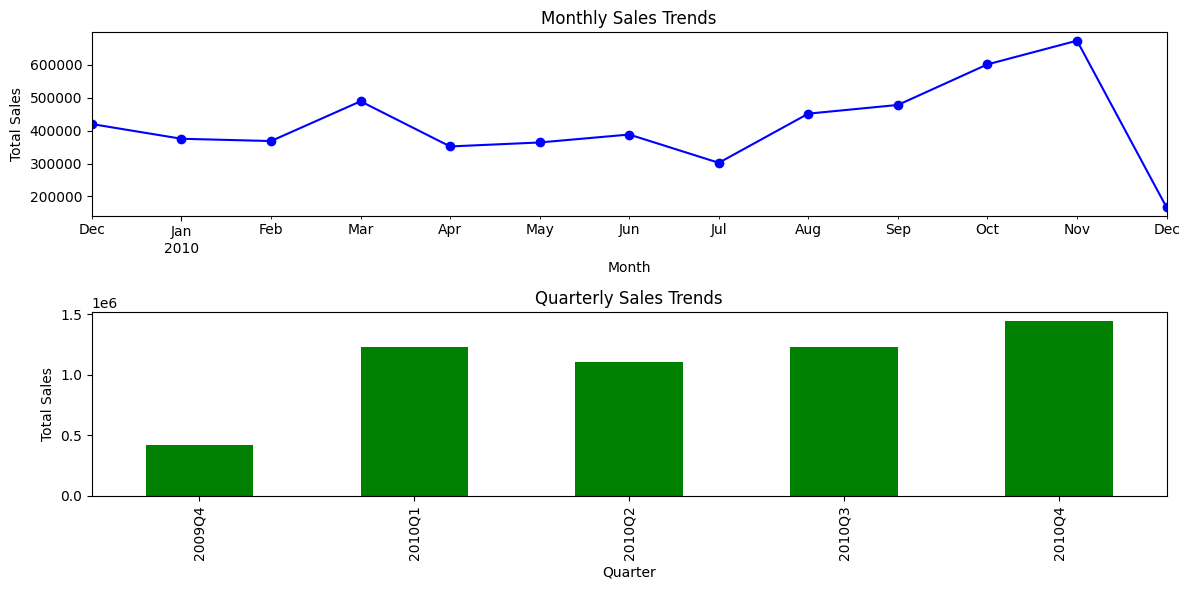

In [8]:
# Sales Trends Over Time

import matplotlib.pyplot as plt

# Extract month and year from InvoiceDate
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
df['InvoiceQuarter'] = df['InvoiceDate'].dt.to_period('Q')

# Group sales data by month and quarter
monthly_sales = df.groupby('InvoiceMonth')['Quantity'].sum()
quarterly_sales = df.groupby('InvoiceQuarter')['Quantity'].sum()

# Plot sales trends
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')

plt.subplot(2, 1, 2)
quarterly_sales.plot(kind='bar', color='g')
plt.title('Quarterly Sales Trends')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()


In [9]:
# Identifying the top-selling products and product categories
# 1. Identify Top-Selling Products
top_selling_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# 2. Identify Top-Selling Product Categories
# Assuming product categories are included in the 'Description' column
df['ProductCategory'] = df['Description'].str.split().str[0]  # Extract first word as product category
top_selling_categories = df.groupby('ProductCategory')['Quantity'].sum().sort_values(ascending=False).head(10)

# Print the top-selling products and categories
print("Top-Selling Products:")
print(top_selling_products)
print("\nTop-Selling Product Categories:")
print(top_selling_categories)


Top-Selling Products:
Description
WHITE HANGING HEART T-LIGHT HOLDER    57733
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54698
BROCADE RING PURSE                    47647
PACK OF 72 RETRO SPOT CAKE CASES      46106
ASSORTED COLOUR BIRD ORNAMENT         44925
60 TEATIME FAIRY CAKE CASES           36326
PACK OF 60 PINK PAISLEY CAKE CASES    31822
JUMBO BAG RED RETROSPOT               30727
SMALL POPCORN HOLDER                  29500
STRAWBERRY CERAMIC TRINKET BOX        26563
Name: Quantity, dtype: int64

Top-Selling Product Categories:
ProductCategory
PACK        379351
RED         219828
JUMBO       206686
SET         157111
ASSORTED    140273
PINK        133425
WHITE       127451
SMALL       103811
LUNCH       103271
SET/6       102243
Name: Quantity, dtype: int64


<ipython-input-11-910279d544d5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


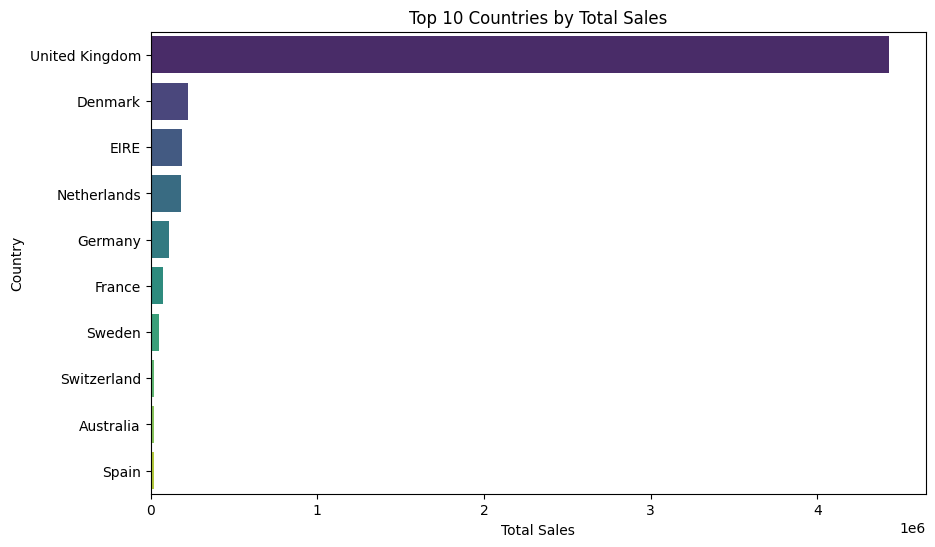

Available columns: Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'InvoiceMonth', 'InvoiceQuarter',
       'ProductCategory'],
      dtype='object')


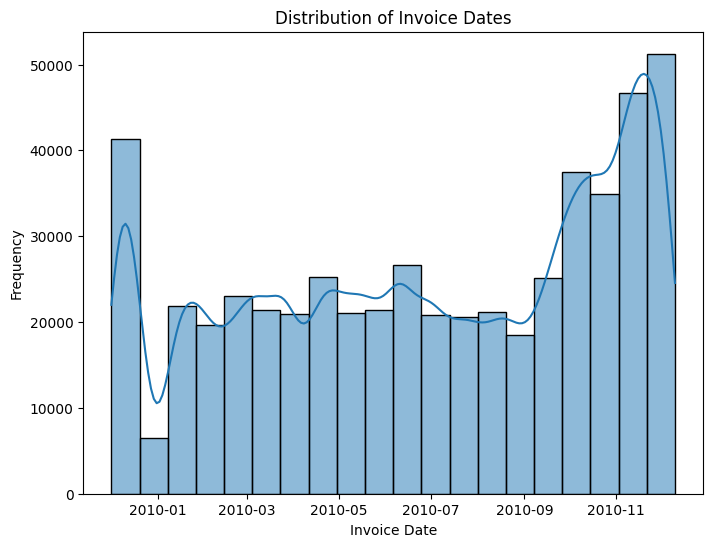

In [11]:
# Exploring sales by country and customer demographics
import seaborn as sns

# 1. Sales by Country
sales_by_country = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)
top_countries = sales_by_country.head(10)

# Visualize sales by country
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show()

# Check the available columns in the DataFrame
available_columns = df.columns
print("Available columns:", available_columns)

# Example: Analyze customer demographics by selecting the appropriate column
# Replace 'CustomerID' with the actual column containing customer information
plt.figure(figsize=(8, 6))
sns.histplot(df['InvoiceDate'], bins=20, kde=True)  # Example: Using 'InvoiceDate' for demonstration
plt.title('Distribution of Invoice Dates')
plt.xlabel('Invoice Date')
plt.ylabel('Frequency')
plt.show()



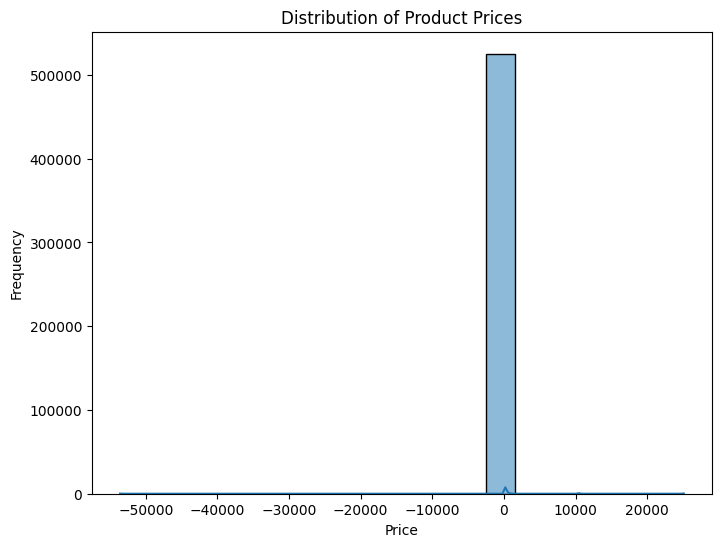

In [15]:
# Visualize the distribution of product prices
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
